## Computing Limitation and Computing Complexity 

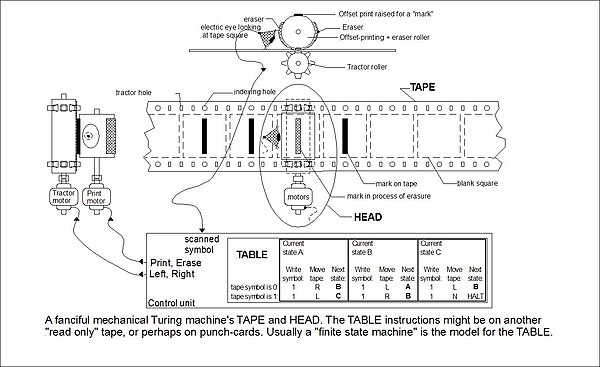

## 图灵证明了，基于这种机器，可以进行任意的计算，除了不能计算某个过程是否终止。

$$ f(x) = x ^ 2 $$

$$ f(x) = x * x = (x + x + x .. + x)  $$

## 是否有一种机器，能够执行任意的数学运算？ 

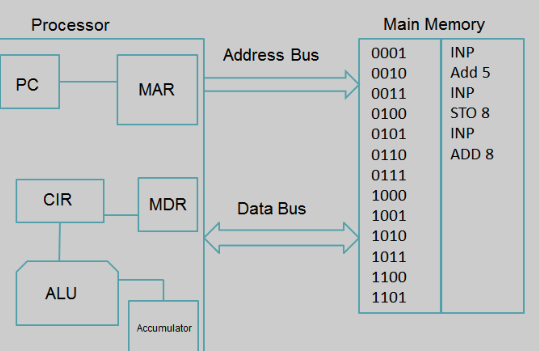

## 排序： 

+ 选择排序：

In [14]:
from icecream import ic

In [48]:
def selection_sort(elements):
    results = []
    
    
    while elements:
        min_num = float('inf')
        min_index = -1
        
        for i in range(len(elements)):
            if min_num > elements[i]:
                min_num = elements[i]
                min_index = i
                
#@        ic(min_index)
#        ic(len(elements))
        results.append(elements.pop(min_index))
    
    return results

$$ T(n) = \sum_{n=1}^{N} c * n = O(n^2)$$

## 迭代不变式 iteration invariant

每迭代一次，有什么特征是一直存在的，有什么特征是在每次迭代都发生的。

In [49]:
selection_sort([19, 10, 11, 1, 0, 12, -1])

[-1, 0, 1, 10, 11, 12, 19]

In [52]:
def merge_sort(elements):
#    ic(elements)
    if len(elements) <= 1: return elements
    
    left_result = merge_sort(elements[:len(elements)//2])
    right_result = merge_sort(elements[len(elements)//2:])
    
    results = []
    
    i, j = 0, 0
    
    while i < len(left_result) and j < len(right_result):
        if left_result[i] < right_result[j]:
            results.append(left_result[i])
            i += 1
        else:
            results.append(right_result[j])
            j += 1
#     ic(i, j)
#     ic(results)
#     ic(left_result)
    if i == len(left_result):  # left is reached the end
        results += right_result[j:]
    else:
        results += left_result[i:]
    
    return results

T(n) = T(n-1), T(n/2) + process(n)

T(n) = 2 * T(n/2) + process(n)

merge_sort: 

T1(n) = 2 * T1(n/2) + n

T2(n) = 10 * T2(n/10) + n

In [ ]:
[n1. n2 n3 n4 n5]

In [152]:
def f(n):
    remain = f(n-1)
    max_ = max(remain)
    
    return n[0] + max_

$$ T(n) = a * T(n-2) + f(n) $$

```
T(n) = a*T(n - 2) + f(n)
T(n-2) = a * T(n - 2 * 2) + f(n - 2)
T(4) = a * T(n - 2 * 2) + f(n - 2)
T(2) = a * T(n - 2 * 2) + f(n - 2)
T(0) = a * T(n - 2 * 2) + f(n - 2)

T(0) + T(2) + .. T(n)
```
$$ \sum_{n=1}^{N/2} ( T(2*n) ) = a * \sum_{n=1}^{N/2-1}( T(2*n)) + \sum_{i=1}^{n/2}f(2n) $$

$$ \sum_{n=1}^{N/2} ( T(2*n) ) = a * \sum_{n=1}^{N/2-1}( T(2*n)) + n^2 $$
$$ (1 - a)T(2*n) = n^2 $$
$$ T(2*n) = (n^2 / (1-a)) $$
$$ O(t) = O(n^2) $$

## Master Method

$$ T(n) = a T(n/b) + f(n) $$

$$ f(n) = O(n^{log_b^{a} - \epsilon}) => T(n) = T(f(n)) $$

$$ if a = 2, b = 2, log_b^2 = 1 $$
$$ f(n) = n^2 $$
$$ f(n) = \theta(n^{log_b^{a} - \epsilon}) => T(n) = T(n^{{log_b^a}} * lgN) $$

$$ if a = 2, b = 2, log_b^2 = 1 $$
$$ f(n) = n $$
=> $ T(n^{log_b^a * lgN}) $

如何 f(n) = T(n) 是 $ O(n^{log_a^b}) $ 的低阶函数， 那么最终的复杂度是 $T(n) = O(n^{log_b^a})$
假设a=2，b=4

+ 分裂增长速度： 
$$ n^{log_b^a} $$

In [156]:
def split_sort_head(elements):
    elements = elements[1:] + elements[0]
    return elements

In [154]:
def split_sort(elements):
    quarter = len(elements) / 4
    indices = [0, quarter, quarter * 2, quarter * 3, -1]
    
    p1 = split_sort_head(elements[indices[0]: indices[1]])
    p2 = split_sort(elements[indices[1]: indices[2]])
    p3 = split_sort(elements[indices[2]: indices[3]])
    p4 = split_sort(elements[indices[3]: indices[4]])
    
    results = []
    
    while p1 or p2 or p3 or p4:
        min_ = float('inf')
        min_j = -1
        ps = [p1, p2, p3, p4]
        for i, p in enumerate(ps):
            if p:
                if p[0] < min_:
                    min_ = p[0]
                    min_j = i
        
        ps[min_j].pop(0)
        
    return results

In [53]:
merge_sort([19, 10, 11, 1, 0, 12, -1])

[-1, 0, 1, 10, 11, 12, 19]

In [54]:
import random

In [58]:
%time r = selection_sort(numbers)

CPU times: user 5 µs, sys: 6 µs, total: 11 µs
Wall time: 14.8 µs


In [59]:
%time r2 = merge_sort(numbers)

CPU times: user 8 µs, sys: 3 µs, total: 11 µs
Wall time: 16.2 µs


In [68]:
%time r = selection_sort(numbers * 1000)

CPU times: user 8 µs, sys: 1e+03 ns, total: 9 µs
Wall time: 13.1 µs


In [71]:
%time r2 = merge_sort(numbers * 100)

CPU times: user 14 µs, sys: 1 µs, total: 15 µs
Wall time: 22.9 µs


In [120]:
lengths = [1000 + 1000 * i for i in range(20)]

In [121]:
from collections import defaultdict

In [122]:
import time

In [123]:
userd_time = defaultdict(list)

In [124]:
def generated_number(length):
    return [random.random() for _ in range(length)]

In [125]:
def get_userd_time(func, arg):
    s = time.time()
    r = func(arg)
    return time.time() - s

In [126]:
from tqdm import tqdm_notebook

In [127]:
for _len in tqdm_notebook(lengths):
    numbers = generated_number(_len)
    
    for func in [selection_sort, merge_sort]:
        cost_time = get_userd_time(func, numbers)
        userd_time[func].append(cost_time)    

/Users/gaominquan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


  0%|          | 0/20 [00:00<?, ?it/s]

In [128]:
from matplotlib import pyplot as plt

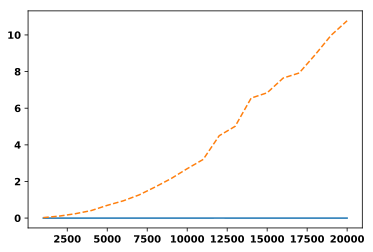

In [129]:
plt.plot(lengths, userd_time[merge_sort], '-')
plt.plot(lengths, userd_time[selection_sort], '--')

## 如何能够估计每个程序的使用时间？

最初期的时候，人们为了得到程序的运行时间，需要对机器码进行分析，一行一行的机器码来获得他的运算时间
+ 1. 计算起来非常复杂
+ 2. 不同的计算机的操作耗费时间是不一样的
+ 3. 由于有过多的细节，未来的趋势判断，就难以判断

```
106 BINARY_SUBSCR
108 LOAD_FAST                2 (right_result)
110 LOAD_FAST                5 (j)
112 BINARY_SUBSCR
114 COMPARE_OP               0 (<)
116 POP_JUMP_IF_FALSE      110
```

In [ ]:
T-106 + T-108 + (T-110 + T-112 + T-114 + T-116) * N

### Consumed Time: 

$$ total-time: C6 + C8 + (C10 + C12 + C14 + C16) * n $$

+ 极限
+ 等阶函数

$$ limit_{x \rightarrow +\infty}e^{-x} + N = N $$

$$ x^n $$

高阶函数： 
+ $f1(x) = x ^ 3$
+ $f2(x) = x ^ 2$

其他复杂情况：

+ $f1(x)_{x \rightarrow 0 } = x * sin(x)$
+ $f2(x)_{x \rightarrow 0 } = x ^ 2 $

+ $ f1(x) = a0 + \sum_{x -> +\infty} b * Q^x, Q < 1 $
+ $ f2(x) = b + \sqrt{x} $

## 等阶函数

$$ limit_{x \rightarrow +\infty} \frac{f1(x)}{f2(x)} = constant $$

$$ t1 = 𝐶6+𝐶8+(𝐶10+𝐶12+𝐶14+𝐶16)∗𝑛 $$

$$ t2 = n^2 $$

为了刻画函数的变化趋势，提出了一个符号 O, 等阶函数或者高阶函数，例如对t1而言，O(t1) 是无穷多个，可以是 $3n, kn, n^2, n^3, n ... $

$$ O(𝐶6+𝐶8+(𝐶10+𝐶12+𝐶14+𝐶16)∗𝑛) = O(n) $$

## Time Complexity

## Time Complexity + Space Complexity => Computing Complexity 

+ Optimization Function 
+ Decision Making Function

case1: 输入n个字符，输入len长度，输出所有长度为len的n个字符的排列组合

```
{a, b, c} 
{ab, aa, ac, bc, ba, bb, ca, cb, cc}
```

case2: n个点，n个点之间或许是有链接的，从a点到b点的最短路径是多少？

case3：n个点，n个点之间或许是有链接的，从a点到b点的最远路径是多少？